In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
yulu_df = pd.read_csv('bike_sharing.txt',delimiter=',')
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<h2>Defining Problem Statement and Analysing basic metrics</h2>
<h3>we have to find out that is the number of users using teh yulu bike rental service is effected because of holiday or season or weather etc using various hypothesis testing methods like ztest, chi-square test, Anova etc</h3>

In [3]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<h3>from the above cell it is clear that except datetime column every other column is either in int or float and the datetime is in object(string) format</h3>

In [4]:
yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<h3>From the above cell it i scleatr that their are no missing values</h3>

In [5]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<h3>from the output of the above cell the mean of temp is 20.23 median is 20.50 and the max is 41 As teh mean and median are almost same and the 75% value and max vaalue are not that far we can say that teh data is not effected by outliers i.e., no sudden extreme temperaters recorded</h3>
<h3>the mean of humidity is 61.88 median is 62 and the max value is 100 so here also the mean and median are almost same and the 75% value and max value are close we can say that the data is not effected with outliers</h3>
<h3>the mean of causal bike renters is 36.02 and the median is 17 the 75% value is 49 and the max value is 367 as the mean and median are far and the 75% value and the max value are also far so we can conclude that their are outliers in this coulmn</h3>
<h3>the mean of registered users is 155.55 median iss 118 75% value is 222 and the max value is 886 the mean and median are almost close but the 75% and max are far so it is likely effected with some outliers</h3>
<h3>the mean of count iss 191.57 median is 145 75% value is 284 and the max value is 977 here the mean and median are far away and also the 75% value and max value are far away so the data is effected with outliers</h3>

In [6]:
yulu_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2012-06-07 21:00:00
freq,1


<h3>from the eabove cell output the datetime is not repeting </h3>

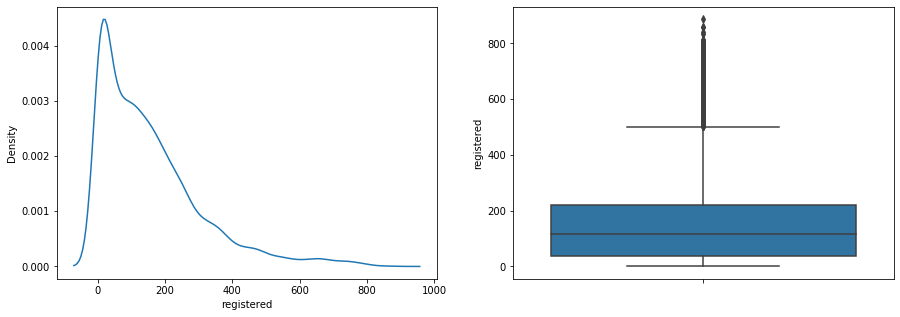

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(data=yulu_df,x='registered')
plt.subplot(122)
sns.boxplot(data=yulu_df,y='registered')
# plt.subplot(122)
plt.show()

<h3>the registered userd are exibiting right tailed dustribution as it is having some outliers it is even clena from the boxployt that their are outliers</h3>

In [8]:
yulu_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
yulu_df_no_datetime = yulu_df.drop('datetime',axis=1)

In [10]:
def all_plots(df):
    plt.figure(figsize=(10,25))
    for i in range(len(df.columns)):
        plt.subplot(11,1,i+1)
        sns.boxplot(data=df,x=df.columns[i])
        plt.ylabel(df.columns[i])
    plt.show()

<h3>The above function is used to plot the box plot of all the columns except datetime</h3>

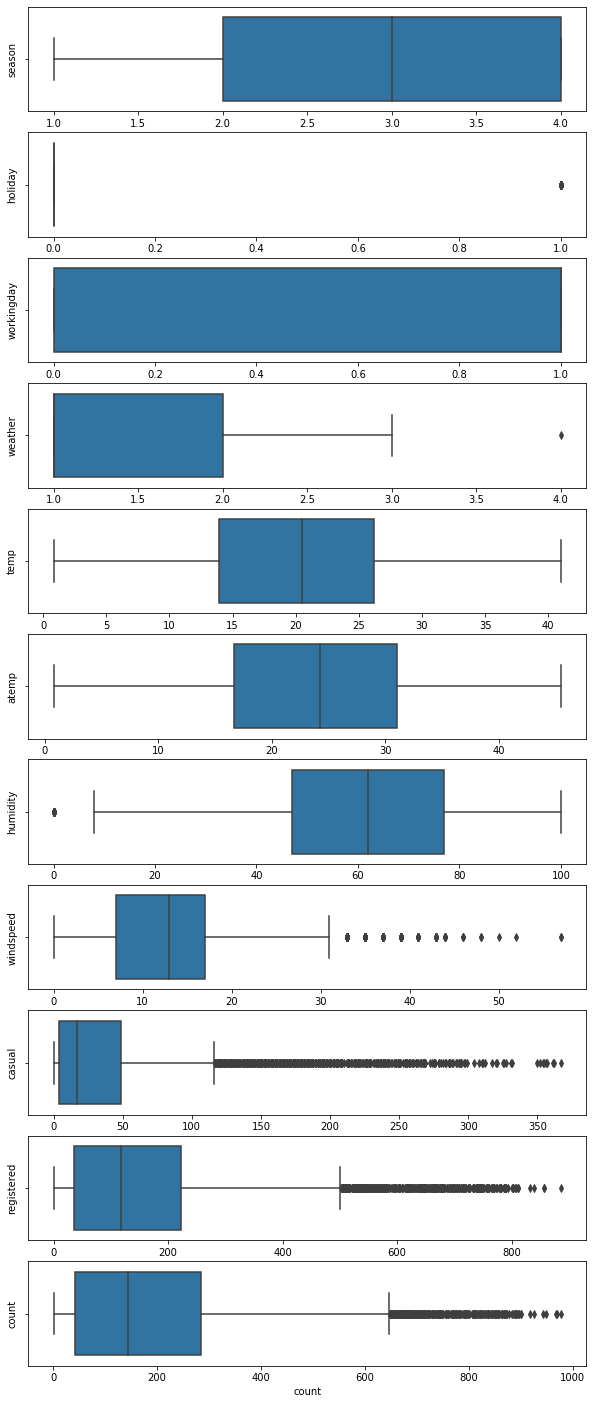

In [11]:
all_plots(yulu_df_no_datetime)

<h2>the values which are above and below the viscures are called outliers</h2>

<h3>from the above plots we can observe that windspeed is having some outliers i.e., windspeed value above 33 aire considered outlier from the above boxplots</h3>
<h3>from the above plots we can observe that casual column ia also having a lot of outliers i.e., the value greaterthan 115 are considered outliers</h3>
<h3>from the above plots we can observe that registered column is also having outliers i.e., values above 500 are considered outliers</h3>
<h3>from the above plots we can observe that count column ia also having outliers i.e., values above 620 are considered outliers</h3>

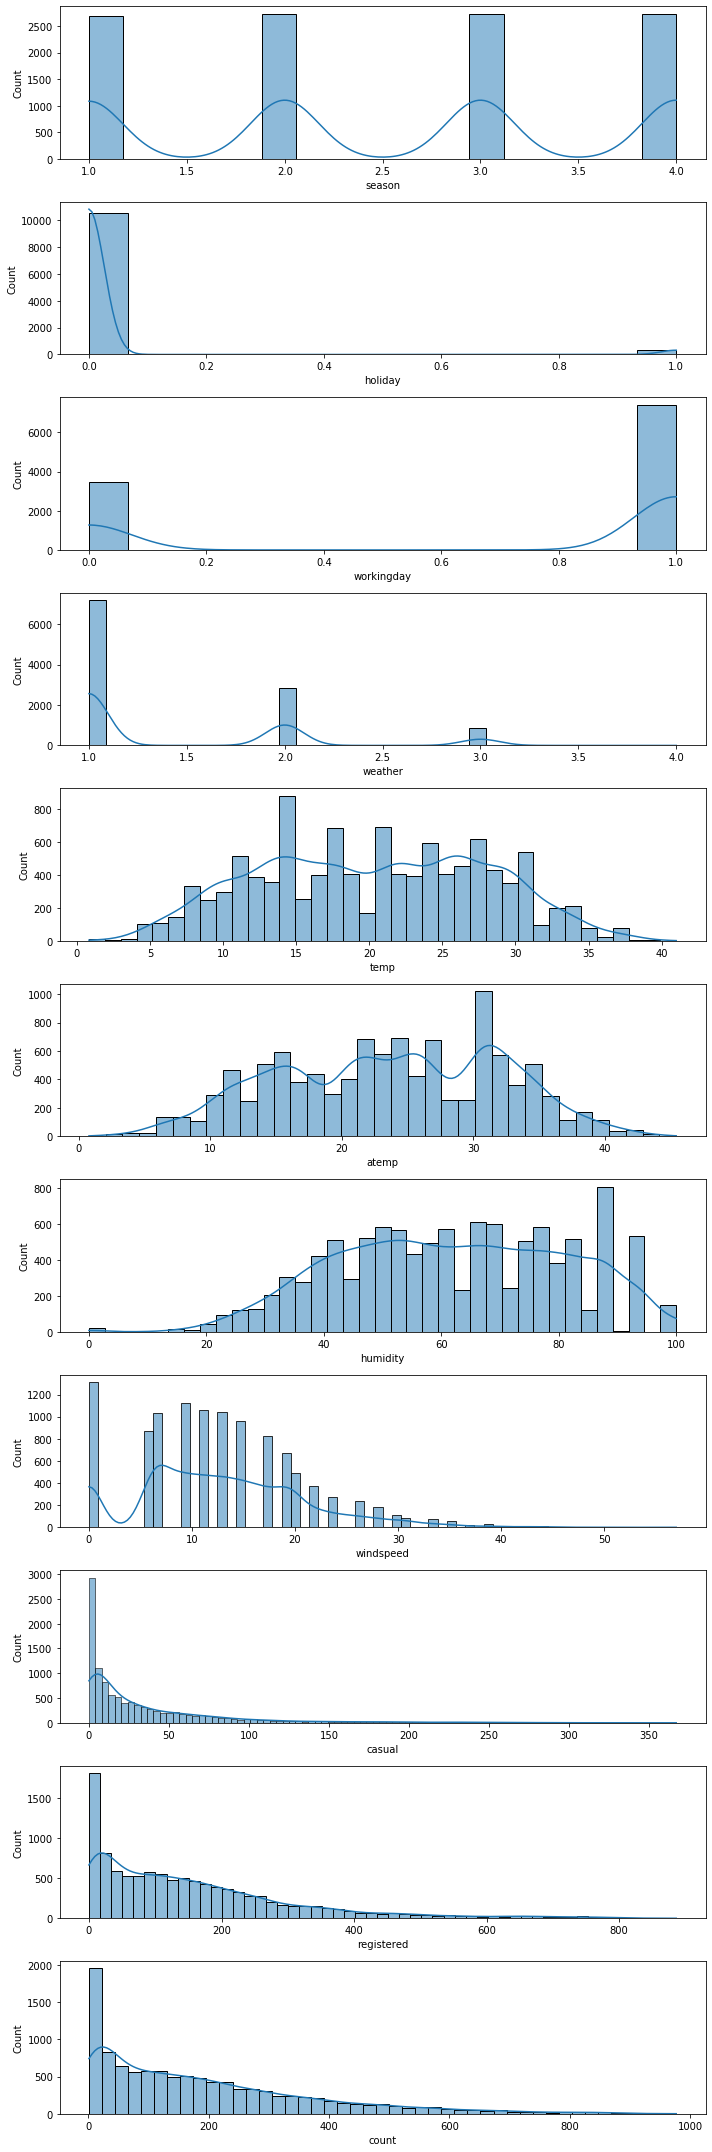

In [12]:
fig, axes = plt.subplots(11,1,figsize=(10,30))
for col, ax in zip(yulu_df_no_datetime.columns,axes.ravel()):
    sns.histplot(data=yulu_df,x=col,ax=ax,kde=True)
    plt.xlabel(col)
fig.tight_layout()
plt.show()

<h3>from the above plots it is clear that casula registered and count all 3 columns follow right tailed distribution</h3>
<h3>if the temp, atemp and humidity values are low then the bike rentel is high</h3>

In [13]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


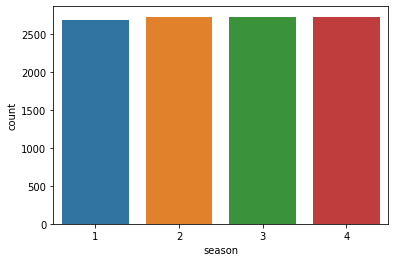

In [14]:
sns.countplot(x=yulu_df['season'])
plt.show()

<h3>from the above countplot we can observe that irresspective of number of bike rents count is not effected because of season</h3>

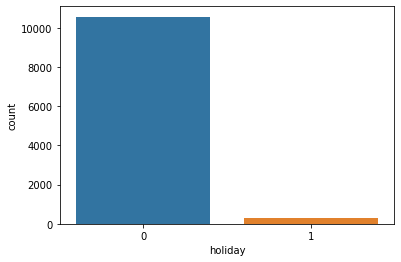

In [15]:
sns.countplot(x=yulu_df['holiday'])
plt.show()

<h3>from the above countplot we can observe that bike rental is high in holidays and low in non holidays</h3>

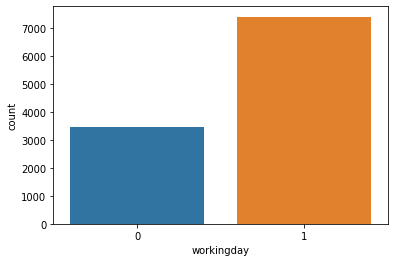

In [16]:
sns.countplot(x=yulu_df['workingday'])
plt.show()

<h3>from the above countplot we can observe that bike rental is high on non working days when compatred to working days</h3>

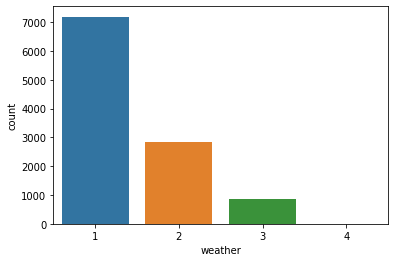

In [17]:
sns.countplot(x=yulu_df['weather'])
plt.show()

<h3>from the above countplot we can observe that weather of type 1 is having highest bike rentels followed by 2 and 3 and the weather 4 is having less than 1000 bikes rented </h3>

<h2>Bivariate Analysis.</h2>

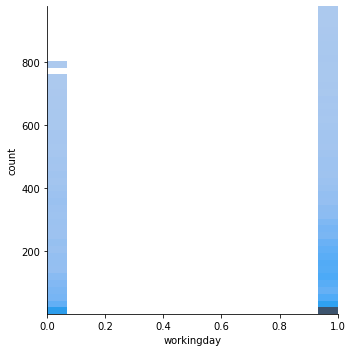

In [18]:
sns.displot(x=yulu_df['workingday'],y=yulu_df['count'])
plt.show()

<h3>from the above displots we can observe that in working days more number of bikes are rented by the customers the most</h3>

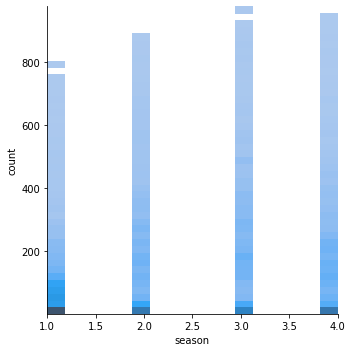

In [19]:
sns.displot(x=yulu_df['season'],y=yulu_df['count'])
plt.show()

<h3>from the above displot we can observe that season diessnot effect the bike renting </h3>

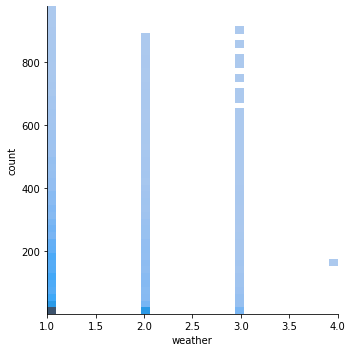

In [20]:
sns.displot(x=yulu_df['weather'],y=yulu_df['count'])
plt.show()

<h3>from the above displot we caan observe that except weather value 4 nothing is effecting the bike rentel service</h3>

<h1>Hypothesis Testing</h1>

<h2>1. 2-sample z Test</h2>
AS the number of samples are large(>30) will be using Z-test insted of T-test and also the sample mean and the varience are known.

<h2>Assumptions of Z-test</h2>
1) The population mean and standerd deviation are finite.
2) Population standerd deviation are known.

<h2>Ho(Null hypothesis):- </h2>
(U1)Mean of number of yulu rental bikes rented by people on weekend or holiday(workingday = 0) is equal (U2)Mean of number of yulu rental bikes rented by people on non holiday or non weekend(workingday = 1)<h3>U1 = U2</h3>.

<h2>Ha(Alternate Hypothesis):- </h2>
(U1)Mean of number of yulu rental bikes rented by people on weekend or holiday(workingday = 0) is not equal (U2)Mean of number of yulu rental bikes rented by people on non holiday or non weekend(workingday = 1)<h3>U1 != U2</h3>.

<h2>alpha(significance level or type I error ):-</h2>
considering 5% significance level

In [21]:
count_0 = yulu_df[yulu_df['workingday']==0]['count']
count_1 = yulu_df[yulu_df['workingday']==1]['count']

In [22]:
yulu_df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [23]:
len(count_0),len(count_1)

(3474, 7412)

In [24]:
np.mean(count_0),np.mean(count_1)

(188.50662061024755, 193.01187263896384)

In [25]:
np.std(count_0),np.std(count_1)

(173.69901006897658, 184.5012116674222)

<h3>the mean and the standerd deviation of the sample are finete so we can use ztest</h3>

In [26]:
zscore = (np.mean(count_0)-np.mean(count_1))/np.sqrt(np.var(count_0)/len(count_0)+np.var(count_1)/len(count_1))

In [27]:
zscore

-1.2364033017261236

<h3>the tsetstatiscis value is -1.23</h3>

In [28]:
stats.norm.cdf(zscore)*2

0.21630868945192083

<h3>we are multiplying with 2 because we are using 2 side ztest</h3>
<h3>the p-value is 0.216</h3>

<h2>below usisng statsmodels library</h2>

In [29]:
from statsmodels.stats.weightstats import ztest

In [30]:
ztest(count_0,count_1)

(-1.2096277376026694, 0.22642176970306893)

<h2>Conclusion</h2>
As from the above cell output we observe that the test statistics is -1.20 and P-value is 0.2264 which is greater that 0.05 so we fail to reject the Null hypothesis.

<h2>2. Chi-square test</h2>
Test of independence(in this test we will be verifying are the 2 variables independent or not)

<h2>Assumptions of chi-square test</h2>
As Chi-square test is non-parameter test(i.e., it did not any assumptions).

<h2>Ho(Null hypothesis)</h2>
season and weather are independent

<h2>Ha(Alternate hypothesis)</h2>
season is dependent on weather

In [31]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<h2>alpha(significance level or type I error ):-</h2>
considering 5% significance level

In [32]:
season_weather_crosstab = pd.crosstab(yulu_df['season'],yulu_df['weather'],margins=True)

<h3>preparing contengency table using crosstab</h3>

In [33]:
season_weather_crosstab

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [34]:
season_weather_crosstab.columns

Index([1, 2, 3, 4, 'All'], dtype='object', name='weather')

In [35]:
row = yulu_df['season'].unique()
column = yulu_df['weather'].unique()

In [36]:
row,column

(array([1, 2, 3, 4], dtype=int64), array([1, 2, 3, 4], dtype=int64))

In [37]:
chi_square = 0
for i in row:
    for j in column:
        observed = season_weather_crosstab[i][j]
        expected = season_weather_crosstab[i]['All']*season_weather_crosstab['All'][j]/season_weather_crosstab['All']['All']
        chi_square += pow((observed-expected),2)/expected

<h3>calculating the test statistics value </h3>

In [38]:
pvalue = 1 -  stats.chi2.cdf(chi_square,(len(row)-1)*(len(column)-1))

In [39]:
pvalue

1.5499250738404413e-07

In [40]:
chi_square,pvalue

(49.15865559689362, 1.5499250738404413e-07)

<h2>Conclusion</h2>
As from the above cell output we observe that the test statistics(chi square) is 49.15 and P-value is 1.54*10^-7 which is far less that 0.05 so we reject the Null hypothesis.i.e., we accept the alternate hypothesis 

<h2>Season is dependent on weather</h2>

<h2>3. Annova</h2>

<h2>Assumptions</h2>
Each group observations are qaussian(almost).
Each group variance is almost the same.


<h2>Ho(Null hupothesis)</h2>
mean of number of cycles rented in different seasons are equal.

<h2>Ha(Alternate hypothesis)</h2>
mean of number of cycles rented in different seasons are not equal.

<h2>alpha(significance level or type I error ):-</h2>
considering 5% significance level

In [41]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
val = yulu_df['season'].unique()

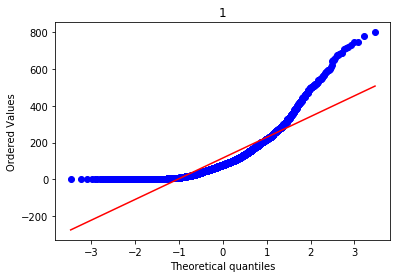

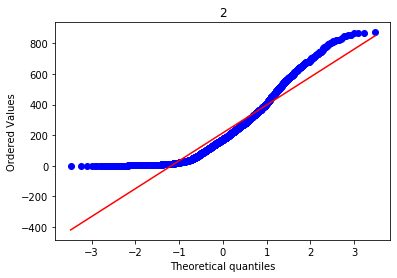

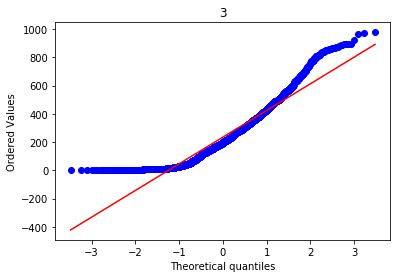

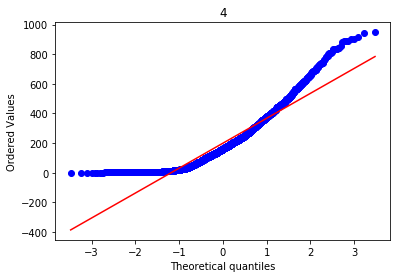

In [43]:
for i in val:
    stats.probplot(yulu_df[yulu_df['season']==i]['count'],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

<h3>from the above qqplots we can observe that the distribution is snot following normal so using boxcox transform to convert them to normal distribution(almost)</h3>

In [44]:
# import statsmodels.api as sm
# ax,_ = stats.boxcox(yulu_df[yulu_df['season']==1]['count'])
# sm.qqplot(ax,line='45',fit=True)
# plt.show()

In [45]:
boxcox_season_data = []
for i in val:
    boxcox_season_data.append(stats.boxcox(yulu_df[yulu_df['season']==i]['count'])[0])

<h3>converting all the 4 season count values to boxcox</h3>

In [46]:
np.std(boxcox_season_data[0]),np.std(boxcox_season_data[1]),np.std(boxcox_season_data[2]),np.std(boxcox_season_data[3])

(4.030523243229806, 6.684198954140307, 8.1292872980543, 6.513358363056977)

<h3>from the above we can observe that the standerd deviation of all the samples is almost same</h3>

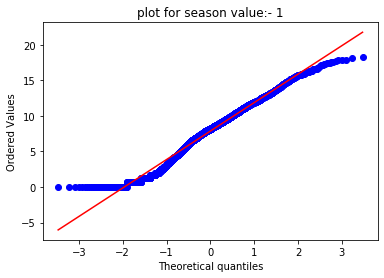

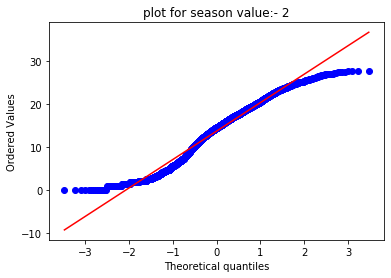

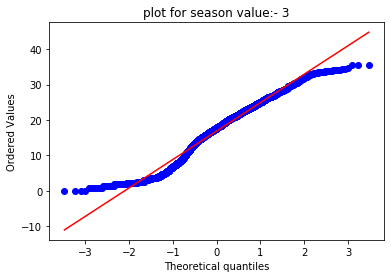

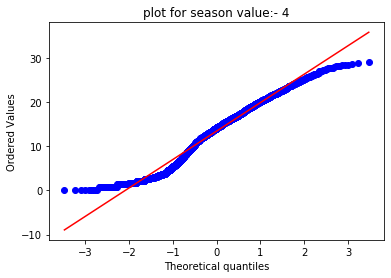

In [47]:
for i in val:
#     ax,_ = stats.boxcox(yulu_df[yulu_df['season']==i]['count'])
    stats.probplot(boxcox_season_data[i-1],dist='norm',plot=plt)
    plt.title('plot for season value:- '+str(i))
    plt.show()

<h3>qqplots after applying boxcox transform is looking almost normal distribution</h3>

<h3>so the basic assumptions of anova are satisfied so applying anova </h3>

In [48]:
len(boxcox_season_data),len(val)

(4, 4)

In [49]:
stats.f_oneway(boxcox_season_data[0],boxcox_season_data[1],boxcox_season_data[2],boxcox_season_data[3])

F_onewayResult(statistic=890.4936156746095, pvalue=0.0)

<h2>Conclusion</h2>
as the pvalue = 0.0 < 0.05 sos rejecting null hypothesis.


<h3>mean of number of cycles rented in different seasons are not equal.</h3>

<h2>Ho(Null hupothesis)</h2>
mean of number of cycles rented in different weather are equal.

<h2>Ha(Alternate hypothesis)</h2>
mean of number of cycles rented in different weather are not equal.

<h2>alpha(significance level or type I error ):-</h2>
considering 5% significance level

In [50]:
yulu_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [51]:
val = yulu_df['weather'].unique()

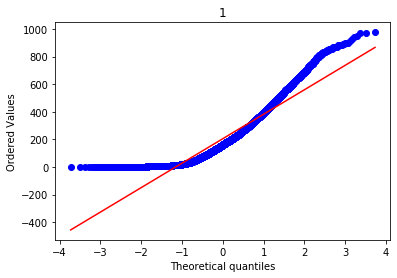

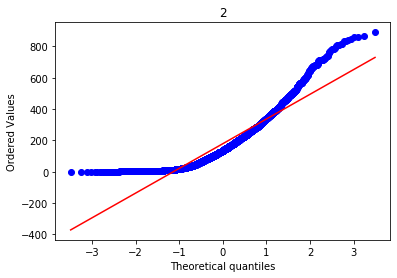

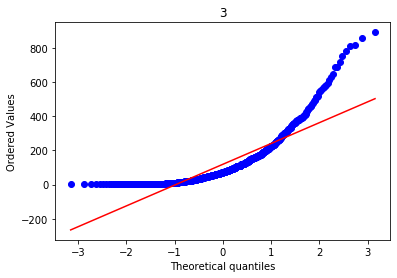

In [52]:
for i in val[:len(val)-1]:
    stats.probplot(yulu_df[yulu_df['weather']==i]['count'],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

In [53]:
boxcox_weather_data = []
for i in val[:len(val)-1]:
    boxcox_weather_data.append(stats.boxcox(yulu_df[yulu_df['weather']==i]['count'])[0])

<h3>converting the non normal value to normal values using boxcox transform</h3>

In [54]:
np.std(boxcox_weather_data[0]),np.std(boxcox_weather_data[1]),np.std(boxcox_weather_data[2])

(6.30925416386386, 5.479240814868601, 3.2364247999840274)

<h3>the standerd deviation of all the 3 samples are almost same </h3>

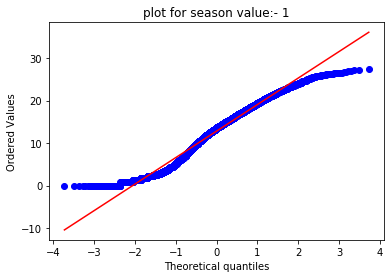

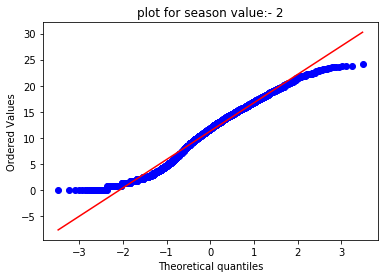

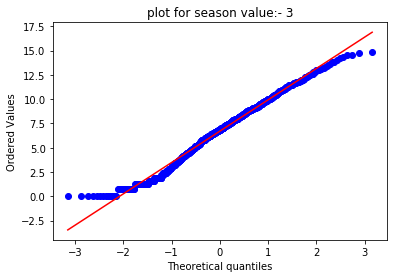

In [55]:
for i in val[:len(val)-1]:
    stats.probplot(boxcox_weather_data[i-1],dist='norm',plot=plt)
    plt.title('plot for season value:- '+str(i))
    plt.show()

<h3>from the qqplot it is clear that the samples follow normal distriibution after boxcox transform</h3>

<h3>so the basic asssumptions of Anova are followed by the samples</h3>

In [56]:
stats.f_oneway(boxcox_weather_data[0],boxcox_weather_data[1],boxcox_weather_data[2])

F_onewayResult(statistic=431.79686015294686, pvalue=3.4867243611236345e-181)

<h3>Conclusion</h3>
as the pvalue is 3.48*10^-181 <<<< 0.05 so rejecting Null hypothesis

mean of number of cycles rented in different weather are not equal.